# Exploratory Data Analysis

Exploring the scrapped data. During this process, data will get cleaned and filtered, and the job description will be analyzed and distilled to extract required skills from them.

In [81]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from thefuzz import fuzz

pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv('./data/full_jobs.csv')
df.head()

,job_position,job_link,company_name,company_profile,job_location,job_posting_date,job_id,Employment_type,Industries,Job_function,Seniority_level,company_linkedin_id,job_description,job_posting_time,people_also_viewed,recruiter_details,similar_jobs
0,Data Scientist,https://sa.linkedin.com/jobs/view/data-scienti...,MatchaTalent,https://id.linkedin.com/company/matchatalent?t...,"Dhahran, Eastern, Saudi Arabia",2023-06-18,3639381396,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,https://id.linkedin.com/company/matchatalent?t...,This role required candidate to permanently re...,2 weeks ago,[{'job_position': 'Data Scientist Job Recruitm...,"[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'AI Engineer', 'job_company'..."
1,Data Science Specialist,https://sa.linkedin.com/jobs/view/data-science...,Halian,https://uk.linkedin.com/company/halian?trk=pub...,"Riyadh, Riyadh, Saudi Arabia",2023-05-16,3608956611,Full-time,IT Services and IT Consulting,Engineering and Information Technology,Entry level,https://uk.linkedin.com/company/halian?trk=pub...,Our ClientWe are partnered with one of the big...,1 month ago,[{'job_position': 'Cybersecurity Governance Sp...,"[{'recruiter_name': '', 'recruiter_title': ''}]",[{'job_position': 'Senior Specialist M&A and I...
2,NaN,https://sa.linkedin.com/jobs/view/data-scienti...,Garima Interprises,NaN,Saudi Arabia,2023-06-02,3645495537,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,We are looking to hire a highly creative data ...,1 month ago,[{'job_position': 'Junior Blockchain Developer...,"[{'recruiter_name': '', 'recruiter_title': ''}]",[{'job_position': 'Junior Python Developer (Re...
3,NaN,https://sa.linkedin.com/jobs/view/data-scienti...,Garima Interprises,NaN,Saudi Arabia,2023-05-11,3626306377,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,We are looking to hire a highly creative data ...,1 month ago,[{'job_position': 'Relocate to the UK - Nurses...,"[{'recruiter_name': '', 'recruiter_title': ''}]",[{'job_position': 'Recruiter - Human Resources...
4,Data Scientist Engineer,https://sa.linkedin.com/jobs/view/data-scienti...,Energy Jobline,https://uk.linkedin.com/company/energy-jobline...,Makkah Region,2023-06-07,3651133334,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,https://uk.linkedin.com/company/energy-jobline...,Aramco energizes the world economy. Aramco occ...,3 weeks ago,[{'job_position': 'Senior Structural Engineer'...,"[{'recruiter_name': '', 'recruiter_title': ''}]",[{'job_position': 'Sr. Engineer - Data center ...


## Cleaning job positions

In [78]:
def wrangle(path='./data/full_jobs.csv'):
    # Read the scrapped data file
    df = pd.read_csv(path)

    # Fill in missing data scientist job positions
    missing_job_pos_mask = df['job_position'].isnull()
    data_scientist_in_link_mask = df['job_link'].str.contains('data-scientist')
    df.loc[(missing_job_pos_mask & data_scientist_in_link_mask), 'job_position'] = 'Data Scientist'

    # Remove remaining missing values in job position
    df.dropna(subset=['job_position'], inplace=True)

    # Get only jobs entitling "Data Scientist" or "Data Scienice" in their job position
    ds_related_mask = df['job_position'].str.contains('(Data Scientist|Data Science)', regex=True)
    df = df.loc[ds_related_mask]

    return df

In [6]:
# How many missing values?
print('Number of missing job positions:', df['job_position'].isnull().sum())
df_missing_job_pos = df[df['job_position'].isnull()]
df_missing_job_pos

Number of missing job positions: 15


,job_position,job_link,company_name,company_profile,job_location,job_posting_date,job_id,Employment_type,Industries,Job_function,Seniority_level,company_linkedin_id,job_description,job_posting_time,people_also_viewed,recruiter_details,similar_jobs
2,NaN,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3645495537?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=UktubiOBzx4KuJ4J78Ex7A%3D%3D&position=3&pageNum=1&...,Garima Interprises,NaN,Saudi Arabia,2023-06-02,3645495537,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",1 month ago,"[{'job_position': 'Junior Blockchain Developer (Remote Internship – IT)', 'job_company': 'TalentKompass Deutschland', 'job_location': 'Kuwait City Metropolitan Area', 'job_posting_time': '1 week a...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Junior Python Developer (Remote Internship – IT)', 'job_company': 'TalentKompass Deutschland', 'job_location': 'Ahmadi, Ahmadi, Kuwait', 'job_posting_time': '1 week ago', 'job_l..."
3,NaN,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3626306377?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=VDZp5e69qg%2F13qEkL7fSXg%3D%3D&position=4&pageNum=...,Garima Interprises,NaN,Saudi Arabia,2023-05-11,3626306377,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",1 month ago,"[{'job_position': 'Relocate to the UK - Nurses', 'job_company': 'Sanctuary International', 'job_location': 'Ahmadi, Ahmadi, Kuwait', 'job_posting_time': '1 month ago', 'job_link': 'https://kw.link...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Recruiter - Human Resources', 'job_company': 'American International University, Kuwait', 'job_location': 'Jahra, Jahra, Kuwait', 'job_posting_time': '1 month ago', 'job_link': ..."
7,NaN,https://sa.linkedin.com/jobs/view/hiring-for-data-scientist-at-niharika-enterprises-3646364989?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=k0GlmIIFpu%2BK9NNIrJKEUw%3D%3D&position=8&pageNum=1&t...,Niharika Enterprises,NaN,Saudi Arabia,2023-06-03,3646364989,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",4 weeks ago,"[{'job_position': 'Plumbing Inspector', 'job_company': 'V2X Inc', 'job_location': 'Kuwait', 'job_posting_time': '4 days ago', 'job_link': 'https://kw.linkedin.com/jobs/view/plumbing-inspector-at-v...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Software APIGEE Developer / Kuwait /Telecom Sector/ Immediate Joiners', 'job_company': 'Diyar United Company', 'job_location': 'Kuwait City, Al Asimah, Kuwait', 'job_posting_tim..."
8,NaN,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3650667632?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=Bg9y1CvxMv2XlTMjAU1KHA%3D%3D&position=9&pageNum=1&...,Garima Interprises,NaN,Saudi Arabia,2023-06-06,3650667632,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",3 weeks ago,"[{'job_position': 'Cloud Engineer', 'job_company': 'SDAIA | سدايا', 'job_location': 'Riyadh, Saudi Arabia', 'job_postin

In [10]:
for lnk in df_missing_job_pos['job_link']:
    print(lnk)

https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3645495537?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=UktubiOBzx4KuJ4J78Ex7A%3D%3D&position=3&pageNum=1&trk=public_jobs_jserp-result_search-card
https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3626306377?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=VDZp5e69qg%2F13qEkL7fSXg%3D%3D&position=4&pageNum=1&trk=public_jobs_jserp-result_search-card
https://sa.linkedin.com/jobs/view/hiring-for-data-scientist-at-niharika-enterprises-3646364989?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=k0GlmIIFpu%2BK9NNIrJKEUw%3D%3D&position=8&pageNum=1&trk=public_jobs_jserp-result_search-card
https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3650667632?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=Bg9y1CvxMv2XlTMjAU1KHA%3D%3D&position=9&pageNum=1&trk=public_jobs_jserp-result_search-card
https://sa.linkedin.com/jobs/view/data-scientist-nl

In [13]:
missing_job_pos_mask = df['job_position'].isnull()
data_scientist_in_link_mask = df['job_link'].str.contains('data-scientist')
should_be_data_scientist = df[missing_job_pos_mask & data_scientist_in_link_mask]
print('Number of missing data scientist job positions:', len(should_be_data_scientist))
should_be_data_scientist

Number of missing data scientist job positions: 11


,job_position,job_link,company_name,company_profile,job_location,job_posting_date,job_id,Employment_type,Industries,Job_function,Seniority_level,company_linkedin_id,job_description,job_posting_time,people_also_viewed,recruiter_details,similar_jobs
2,NaN,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3645495537?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=UktubiOBzx4KuJ4J78Ex7A%3D%3D&position=3&pageNum=1&...,Garima Interprises,NaN,Saudi Arabia,2023-06-02,3645495537,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",1 month ago,"[{'job_position': 'Junior Blockchain Developer (Remote Internship – IT)', 'job_company': 'TalentKompass Deutschland', 'job_location': 'Kuwait City Metropolitan Area', 'job_posting_time': '1 week a...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Junior Python Developer (Remote Internship – IT)', 'job_company': 'TalentKompass Deutschland', 'job_location': 'Ahmadi, Ahmadi, Kuwait', 'job_posting_time': '1 week ago', 'job_l..."
3,NaN,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3626306377?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=VDZp5e69qg%2F13qEkL7fSXg%3D%3D&position=4&pageNum=...,Garima Interprises,NaN,Saudi Arabia,2023-05-11,3626306377,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",1 month ago,"[{'job_position': 'Relocate to the UK - Nurses', 'job_company': 'Sanctuary International', 'job_location': 'Ahmadi, Ahmadi, Kuwait', 'job_posting_time': '1 month ago', 'job_link': 'https://kw.link...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Recruiter - Human Resources', 'job_company': 'American International University, Kuwait', 'job_location': 'Jahra, Jahra, Kuwait', 'job_posting_time': '1 month ago', 'job_link': ..."
7,NaN,https://sa.linkedin.com/jobs/view/hiring-for-data-scientist-at-niharika-enterprises-3646364989?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=k0GlmIIFpu%2BK9NNIrJKEUw%3D%3D&position=8&pageNum=1&t...,Niharika Enterprises,NaN,Saudi Arabia,2023-06-03,3646364989,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",4 weeks ago,"[{'job_position': 'Plumbing Inspector', 'job_company': 'V2X Inc', 'job_location': 'Kuwait', 'job_posting_time': '4 days ago', 'job_link': 'https://kw.linkedin.com/jobs/view/plumbing-inspector-at-v...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Software APIGEE Developer / Kuwait /Telecom Sector/ Immediate Joiners', 'job_company': 'Diyar United Company', 'job_location': 'Kuwait City, Al Asimah, Kuwait', 'job_posting_tim..."
8,NaN,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3650667632?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=Bg9y1CvxMv2XlTMjAU1KHA%3D%3D&position=9&pageNum=1&...,Garima Interprises,NaN,Saudi Arabia,2023-06-06,3650667632,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",3 weeks ago,"[{'job_position': 'Cloud Engineer', 'job_company': 'SDAIA | سدايا', 'job_location': 'Riyadh, Saudi Arabia', 'job_postin

In [14]:
df.loc[(missing_job_pos_mask & data_scientist_in_link_mask), 'job_position'] = 'Data Scientist'
df.loc[(missing_job_pos_mask & data_scientist_in_link_mask)]

,job_position,job_link,company_name,company_profile,job_location,job_posting_date,job_id,Employment_type,Industries,Job_function,Seniority_level,company_linkedin_id,job_description,job_posting_time,people_also_viewed,recruiter_details,similar_jobs
2,Data Scientist,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3645495537?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=UktubiOBzx4KuJ4J78Ex7A%3D%3D&position=3&pageNum=1&...,Garima Interprises,NaN,Saudi Arabia,2023-06-02,3645495537,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",1 month ago,"[{'job_position': 'Junior Blockchain Developer (Remote Internship – IT)', 'job_company': 'TalentKompass Deutschland', 'job_location': 'Kuwait City Metropolitan Area', 'job_posting_time': '1 week a...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Junior Python Developer (Remote Internship – IT)', 'job_company': 'TalentKompass Deutschland', 'job_location': 'Ahmadi, Ahmadi, Kuwait', 'job_posting_time': '1 week ago', 'job_l..."
3,Data Scientist,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3626306377?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=VDZp5e69qg%2F13qEkL7fSXg%3D%3D&position=4&pageNum=...,Garima Interprises,NaN,Saudi Arabia,2023-05-11,3626306377,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",1 month ago,"[{'job_position': 'Relocate to the UK - Nurses', 'job_company': 'Sanctuary International', 'job_location': 'Ahmadi, Ahmadi, Kuwait', 'job_posting_time': '1 month ago', 'job_link': 'https://kw.link...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Recruiter - Human Resources', 'job_company': 'American International University, Kuwait', 'job_location': 'Jahra, Jahra, Kuwait', 'job_posting_time': '1 month ago', 'job_link': ..."
7,Data Scientist,https://sa.linkedin.com/jobs/view/hiring-for-data-scientist-at-niharika-enterprises-3646364989?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=k0GlmIIFpu%2BK9NNIrJKEUw%3D%3D&position=8&pageNum=1&t...,Niharika Enterprises,NaN,Saudi Arabia,2023-06-03,3646364989,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",4 weeks ago,"[{'job_position': 'Plumbing Inspector', 'job_company': 'V2X Inc', 'job_location': 'Kuwait', 'job_posting_time': '4 days ago', 'job_link': 'https://kw.linkedin.com/jobs/view/plumbing-inspector-at-v...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Software APIGEE Developer / Kuwait /Telecom Sector/ Immediate Joiners', 'job_company': 'Diyar United Company', 'job_location': 'Kuwait City, Al Asimah, Kuwait', 'job_posting_tim..."
8,Data Scientist,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3650667632?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=Bg9y1CvxMv2XlTMjAU1KHA%3D%3D&position=9&pageNum=1&...,Garima Interprises,NaN,Saudi Arabia,2023-06-06,3650667632,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",3 weeks ago,"[{'job_position': 'Cloud Engineer', 'job_company': 'SDAIA | سدايا', 'job_lo

In [15]:
df[df['job_position'].isnull()]

,job_position,job_link,company_name,company_profile,job_location,job_posting_date,job_id,Employment_type,Industries,Job_function,Seniority_level,company_linkedin_id,job_description,job_posting_time,people_also_viewed,recruiter_details,similar_jobs
71,NaN,https://sa.linkedin.com/jobs/view/hiring-for-testing-engineer-at-niharika-enterprises-3636051576?refId=IxtDOpdo5ja4sYeQf8L6%2FQ%3D%3D&trackingId=FzfAkrSKtkdSHmET7YK6Ug%3D%3D&position=20&pageNum=4&...,Niharika Enterprises,NaN,Saudi Arabia,2023-06-16,3636051576,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a skilled test engineer to design and implement quality-check procedures for our products. As a test engineer, you will be responsible for analyzing the product features, de...",2 weeks ago,[],"[{'recruiter_name': '', 'recruiter_title': ''}]",[]
101,NaN,https://ae.linkedin.com/jobs/view/data-analyst-recruitment-at-garima-interprises-3595394797?refId=tqXQsmjCkVa1NOXSpBawEw%3D%3D&trackingId=PWEaba%2FrdPNwUavs%2BeGRog%3D%3D&position=25&pageNum=1&trk...,Garima Interprises,NaN,"Dubai, Dubai, United Arab Emirates",2023-05-04,3595394797,Full-time,Staffing and Recruiting,Information Technology,Entry level,NaN,"We are looking to hire a data analyst to join our data team. You will take responsibility for managing our master data set, developing reports, and troubleshooting data issues. To do well in this ...",1 month ago,"[{'job_position': 'AI Engineer', 'job_company': 'SDAIA | سدايا', 'job_location': 'Riyadh, Saudi Arabia', 'job_posting_time': '2 weeks ago', 'job_link': 'https://sa.linkedin.com/jobs/view/ai-engine...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Data Analyst', 'job_company': 'Artefact', 'job_location': 'Riyadh, Saudi Arabia', 'job_posting_time': '1 week ago', 'job_link': 'https://sa.linkedin.com/jobs/view/data-analyst-a..."
131,NaN,https://ae.linkedin.com/jobs/view/rust-software-engineer-at-high-frequency-trader-3649953736?refId=snDFLoYsRRJhvEnwRspVfQ%3D%3D&trackingId=1fvlYd3hbI2G72LqR5A6qQ%3D%3D&position=9&pageNum=3&trk=pub...,High Frequency Trader,NaN,"Dubai, United Arab Emirates",2023-06-28,3649953736,Full-time,Software Development and Financial Services,Information Technology and Finance,Not Applicable,NaN,"A team of highly skilled quantitative traders have set up a new company in Dubai to deploy a variety of systematic trading strategies, which have proven to be very lucrative.The team have impressi...",4 days ago,"[{'job_position': 'Junior Fullstack Developer - Dubai', 'job_company': 'Global Talent Exchange', 'job_location': 'Dubai, Dubai, United Arab Emirates', 'job_posting_time': '2 months ago', 'job_link...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Junior Software Engineer', 'job_company': 'Energetech', 'job_location': 'Dubai, Dubai, United Arab Emirates', 'job_posting_time': '1 month ago', 'job_link': 'https://ae.linkedin..."
182,NaN,https://eg.linkedin.com/jobs/view/django-developer-at-%D9%85%D8%B1%D8%B5%D8%AF-%D8%A7%D9%84%D8%AE%D8%A8%D8%B1%D8%A7%D8%A1-%D8%A7%D9%84%D8%AE%D9%84%D9%8A%D8%AC%D9%8A%D9%8A%D9%86-3652827681?refId=h%...,مرصد الخبراء الخليجيين,NaN,Egypt,2023-07-01,3652827681,Full-time,NaN,NaN,NaN,NaN,"About Us :We are looking for a Full Stack Developer to join our team and work on improving our platform.Key Skills :· Strong knowledge and experience in Python, Django, & Django Rest Framewor...",1 day ago,"[{'job_position': 'Senior React Native Developer (Remote)', 'job_company': 'Hyrd Consulting', 'job_location': 'Egypt', 'job_posting_time': '1 week ago', 'job_link': 'https://eg.linkedin.com/jobs/v...","[{'recruiter_photo': 'https://static.licdn.com/aero-v1/sc/h/9c8pery4andzj6ohjkjp54ma2', 'recruiter_name': 'Mohammed Alammar', 'recruiter_title': ''}]","[{'job_position': 'Odoo Developer', 'job_company': 'Parkville', 'job_location': 'Giza, Al Jizah, Egypt', 'job_posting_time': '1 week ago', 'job_link': 'https://eg.linkedin.com/jobs/vi

In [17]:
df.dropna(subset=['job_position'], inplace=True)
df[df['job_position'].isnull()]

,job_position,job_link,company_name,company_profile,job_location,job_posting_date,job_id,Employment_type,Industries,Job_function,Seniority_level,company_linkedin_id,job_description,job_posting_time,people_also_viewed,recruiter_details,similar_jobs


In [73]:
ds_related_mask = df['job_position'].str.contains('(Data Scientist|Data Science)', regex=True)
not_ds_related_mask = ~df['job_position'].str.contains('(Data Scientist|Data Science)', regex=True)

/var/folders/7n/pnznj5fn6mb8ljs3z_wd63hh0000gn/T/ipykernel_18828/2458258347.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  ds_related_mask = df['job_position'].str.contains('(Data Scientist|Data Science)', regex=True)
/var/folders/7n/pnznj5fn6mb8ljs3z_wd63hh0000gn/T/ipykernel_18828/2458258347.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  not_ds_related_mask = ~df['job_position'].str.contains('(Data Scientist|Data Science)', regex=True)


In [74]:
print(f'Percentage of data scientist posts to all job positions: {100 * df.loc[ds_related_mask].shape[0] / df.shape[0]:.2f}%')

Percentage of data scientist posts to all job positions: 35.66%


In [75]:
# Get data scientist jobs only
df_ds = df.loc[ds_related_mask]

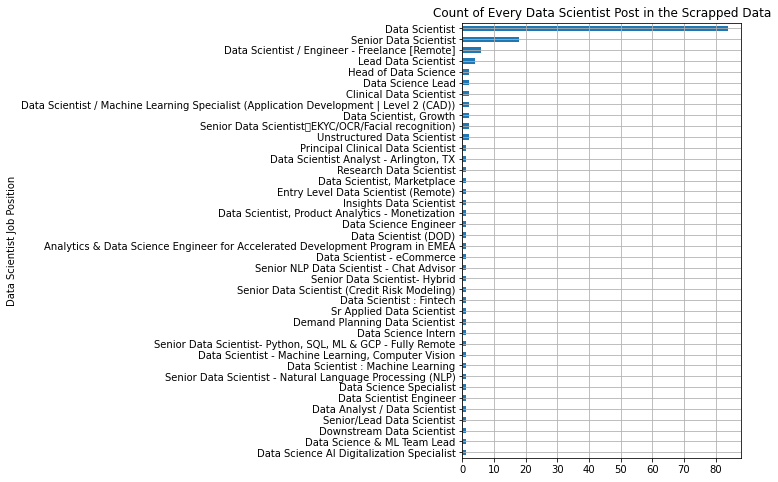

In [76]:
df_ds['job_position'].value_counts(ascending=True).tail(40).plot(
    kind='barh',
    figsize=[5, 8],
    title='Count of Every Data Scientist Post in the Scrapped Data',
    xlabel='Data Scientist Job Position',
    ylabel='Frequency [count]',
    grid=True
);

### Trying get jobs similar to data scientist

In [57]:
from difflib import SequenceMatcher

sorting_key = df['job_position'].apply(
    lambda x: SequenceMatcher(a='Data Scientist', b=x, autojunk=True).ratio()
)

df['data_scientist_similarity'] = sorting_key

df_sorted = df.sort_values(by='job_position', 
               key=lambda x: df['data_scientist_similarity'],
               ascending=False
               )
df_sorted.head(3)

,job_position,job_link,company_name,company_profile,job_location,job_posting_date,job_id,Employment_type,Industries,Job_function,Seniority_level,company_linkedin_id,job_description,job_posting_time,people_also_viewed,recruiter_details,similar_jobs,data_scientist_similarity
0,Data Scientist,https://sa.linkedin.com/jobs/view/data-scientist-at-matchatalent-3639381396?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=ro1FnvZ6LZOI9LyzVGleEg%3D%3D&position=1&pageNum=1&trk=public_jobs_jserp-...,MatchaTalent,https://id.linkedin.com/company/matchatalent?trk=public_jobs_jserp-result_job-search-card-subtitle,"Dhahran, Eastern, Saudi Arabia",2023-06-18,3639381396,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,https://id.linkedin.com/company/matchatalent?trk=public_jobs_topcard-org-name,"This role required candidate to permanently relocate at Dhahran, Saudi Arabia. About the CompanyThis company engages in the exploration, production, transportation, and sale of crude oil and natur...",2 weeks ago,"[{'job_position': 'Data Scientist Job Recruitment', 'job_company': 'Garima Interprises', 'job_location': 'Saudi Arabia', 'job_posting_time': '1 month ago', 'job_link': 'https://sa.linkedin.com/job...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'AI Engineer', 'job_company': 'SDAIA | سدايا', 'job_location': 'Riyadh, Saudi Arabia', 'job_posting_time': '2 weeks ago', 'job_link': 'https://sa.linkedin.com/jobs/view/ai-engine...",1.0
446,Data Scientist,https://www.linkedin.com/jobs/view/data-scientist-at-blastpoint-3630172720?refId=zJHsR%2FuRoZIajfj7SZ5TzQ%3D%3D&trackingId=kBzoGDjBarkPfm6mn3fCiQ%3D%3D&position=6&pageNum=2&trk=public_jobs_jserp-r...,BlastPoint,https://www.linkedin.com/company/blastpoint?trk=public_jobs_jserp-result_job-search-card-subtitle,"Pittsburgh, PA",2023-06-13,3630172720,Full-time,Software Development,Engineering and Information Technology,Entry level,https://www.linkedin.com/company/blastpoint?trk=public_jobs_topcard-org-name,Salary Range: $100-140KAbout UsBlastPoint is a B2B data analytics startup located in the East Liberty neighborhood of Pittsburgh. We give companies the power to solve business problems through dis...,2 weeks ago,"[{'job_position': 'Adobe Journey Optimizer Developer', 'job_company': 'CGI', 'job_location': 'Pittsburgh, PA', 'job_posting_time': '5 days ago', 'job_link': 'https://www.linkedin.com/jobs/view/ado...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Data Scientist Specialist', 'job_company': 'Jobs via eFinancialCareers', 'job_location': 'Pittsburgh, PA', 'job_posting_time': '7 hours ago', 'job_link': 'https://www.linkedin.c...",1.0
118,Data Scientist,https://ae.linkedin.com/jobs/view/data-scientist-at-halian-3584041431?refId=YQ68f%2BCdvyVkG%2F1dZcIkig%3D%3D&trackingId=cvzigS3c6gKL7L%2BAcFZGOw%3D%3D&position=20&pageNum=2&trk=public_jobs_jserp-r...,Halian,https://uk.linkedin.com/company/halian?trk=public_jobs_jserp-result_job-search-card-subtitle,"Dubai, Dubai, United Arab Emirates",2023-03-30,3584041431,Full-time,IT Services and IT Consulting,Engineering and Information Technology,Entry level,https://uk.linkedin.com/company/halian?trk=public_jobs_topcard-org-name,Our ClientWe are working with a Global Technology provider.On their behalf we are looking for a Data Scientist to support the delivery of anti-fraud solutions to customers in Riyadh.Your Responsib...,3 months ago,"[{'job_position': 'Senior Data Scientist', 'job_company': 'G42', 'job_location': 'Abu Dhabi, Abu Dhabi Emirate, United Arab Emirates', 'job_posting_time': '2 weeks ago', 'job_link': 'https://ae.li...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'SDET - Performance Engineer', 'job_company': 'Lean Technologies', 'job_location': 'Dubai, Dubai, United Arab Emirates', 'job_posting_time': '4 months ago', 'job_link': 'https://...",1.0


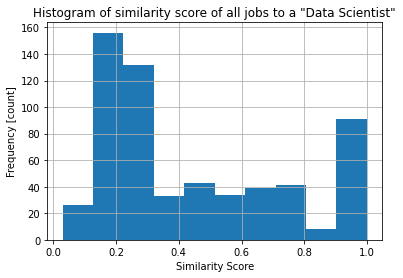

In [58]:
df['data_scientist_similarity'].hist()
plt.title('Histogram of similarity score of all jobs to a "Data Scientist"')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency [count]');

The histogram shows that the majority of jobs have a score between 0.1 to 0.3 similarity to data scientist which means that the majority of jobs are not much related to data scientist. I further investigate these jobs to look at the job positions.

In [71]:
def plot_similar_jobs(lower, upper, n, figsize=[5,9], similarity_col='data_scientist_similarity'):
    return (df[df[similarity_col].between(lower, upper)]
            .sort_values('data_scientist_similarity', ascending=False)['job_position']
            .value_counts(ascending=True)
            .tail(n)
            .plot(
                kind='barh',
                title=f'Count of jobs between {lower} and {upper} similarity score to data scientist',
                xlabel='Job Position',
                ylabel='Count',
                figsize=figsize
            ))

Number of posts with similarity between 0.1 and 0.3 to data scientist: 295
This makes 48.92% of all job positions


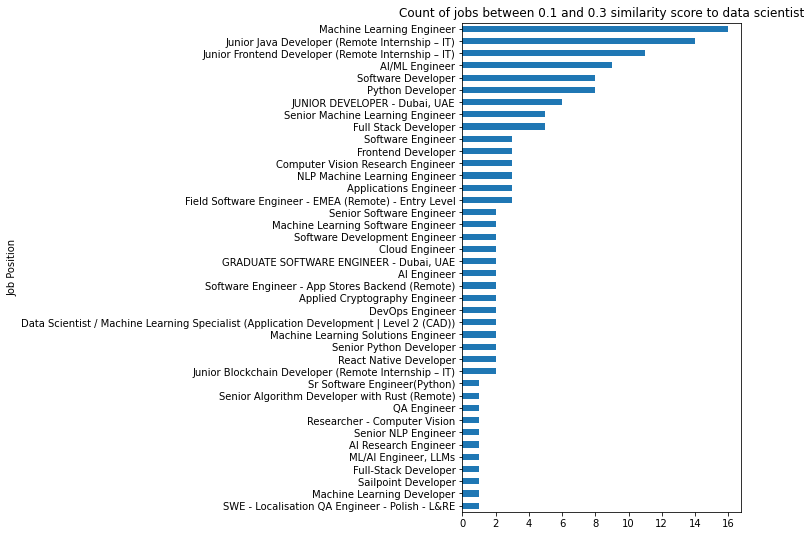

In [68]:
lower = 0.1
upper = 0.3
plot_similar_jobs(lower, upper, 40);
print(f'Number of posts with similarity between {lower} and {upper} to data scientist: {len(df[df["data_scientist_similarity"].between(lower, upper)])}')
print(f'This makes {100 * len(df[df["data_scientist_similarity"].between(lower, upper)]) / len(df):.2f}% of all job positions')

Number of posts with similarity between 0.3 and 0.8 to data scientist: 201
This makes 33.33% of all job positions


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)


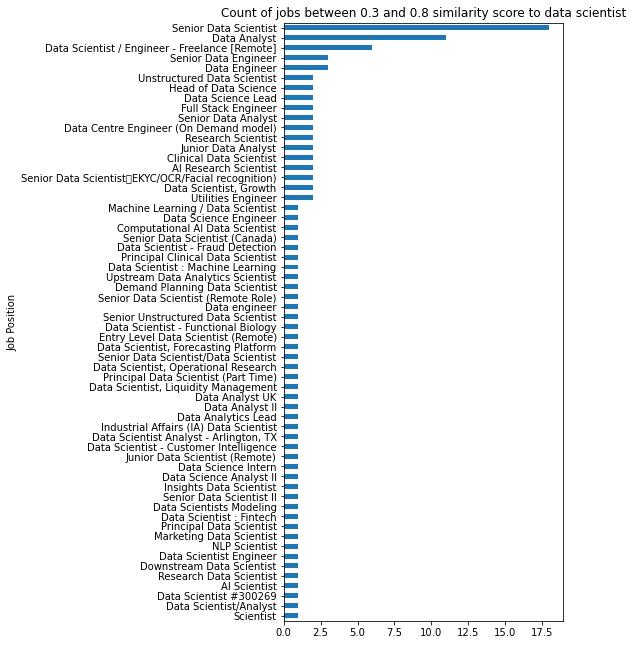

In [72]:
lower = 0.3
upper = 0.8
plot_similar_jobs(lower, upper, 60, figsize=[5,11]);
print(f'Number of posts with similarity between {lower} and {upper} to data scientist: {len(df[df["data_scientist_similarity"].between(lower, upper)])}')
print(f'This makes {100 * len(df[df["data_scientist_similarity"].between(lower, upper)]) / len(df):.2f}% of all job positions')

Anyway, this kind of similarity analysis yields job positions such as data engineers, AI research scientists and etc. which might have different set of required skills. I will only focus this analysis on jobs that have "Data Scientist" explicitly in their job titles.

---

### Trying using `thefuzz` library to calculate similarity between job positions and `data scientist`.

In [92]:
sorting_key = df['job_position'].apply(
    lambda x: fuzz.partial_ratio(x.lower(), 'data scientist')
)

df['fuzz_partial_ratio'] = sorting_key

df.sort_values(by='job_position', 
               key=lambda x: sorting_key,
               ascending=False
               )[['job_position', 'fuzz_partial_ratio']].head(30)

,job_position,fuzz_partial_ratio
0,Data Scientist,100
165,Unstructured Data Scientist,100
424,"Data Scientist Analyst - Arlington, TX",100
422,Entry Level Data Scientist (Remote),100
421,Data Scientist,100
420,"Data Scientist, Product Analytics - Monetization",100
419,Data Scientist (DOD),100
417,Data Scientist,100
405,Senior Data Scientist,100
404,Senior Data Scientist（EKYC/OCR/Facial recognition),100


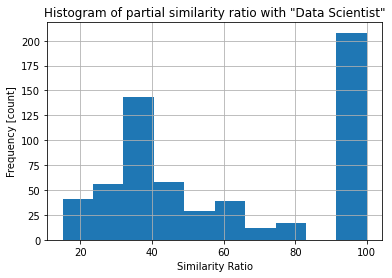

In [93]:
df['fuzz_partial_ratio'].hist()
plt.title('Histogram of partial similarity ratio with "Data Scientist"')
plt.xlabel('Similarity Ratio')
plt.ylabel('Frequency [count]');

In [97]:
lower, upper = 30, 40
print(f"Number of jobs with similarity ration to data scientist between {lower} and {upper} is {df.loc[df['fuzz_partial_ratio'].between(lower, upper), ['job_position', 'fuzz_partial_ratio']].shape[0]}")
df.loc[df['fuzz_partial_ratio'].between(lower, upper), ['job_position', 'fuzz_partial_ratio']].sort_values('fuzz_partial_ratio').head(30)

Number of jobs with similarity ration to data scientist between 30 and 40 is 148


,job_position,fuzz_partial_ratio
137,FPGA Embedded Vision Developer - Autonomous Robotics,30
534,ML-Ops Engineer,30
214,Mobile Application Developer(React native),31
31,Growth Hacker,31
394,MLOps Engineer,31
163,Tech Lead /Python - Jesica.ai,32
83,Researcher - Computer Vision,32
244,"ETIC, Software Engineer (Machine Learning Systems) - Senior Associate",33
381,Python Developer - Blueface,33
133,Blockchain Engineer - Rust & Substrate,33


In [98]:
lower, upper = 80, 100
print(f"Number of jobs with similarity ration to data scientist between {lower} and {upper} is {df.loc[df['fuzz_partial_ratio'].between(lower, upper), ['job_position', 'fuzz_partial_ratio']].shape[0]}")
df.loc[df['fuzz_partial_ratio'].between(lower, upper), ['job_position', 'fuzz_partial_ratio']].sort_values('fuzz_partial_ratio').head(30)

Number of jobs with similarity ration to data scientist between 80 and 100 is 208


,job_position,fuzz_partial_ratio
551,AI Scientist,92
0,Data Scientist,100
470,Data Scientist - Fraud Detection,100
471,Senior Data Scientist (Remote Role),100
472,Senior Data Scientist (WA),100
473,Data Scientist,100
475,Data Scientists Modeling,100
476,Data Scientist,100
479,Data Scientist 1,100
480,Data Scientist,100


In [105]:
lower, upper = 70, 100
print(f"Number of jobs with similarity ration to data scientist between {lower} and {upper} is {df.loc[df['fuzz_partial_ratio'].between(lower, upper), ['job_position', 'fuzz_partial_ratio']].shape[0]}")
df.loc[df['fuzz_partial_ratio'].between(lower, upper), ['job_position', 'fuzz_partial_ratio']].sort_values('fuzz_partial_ratio').head(50)

Number of jobs with similarity ration to data scientist between 70 and 100 is 237


,job_position,fuzz_partial_ratio
597,Data Science Analyst II,71
23,Data Science AI Digitalization Specialist,71
22,Sr. Engineer - Data center Service,71
16,Data Science & ML Team Lead,71
407,Analytics & Data Science Engineer for Accelerated Development Program in EMEA,71
311,Data Science Engineer,71
379,Scientist/Sr. Scientist/Principal Scientist - MES,71
88,Lead - Data Science - Financial Services,71
580,Machine Learning Scientist - NLP,71
218,Data Science Lead,71


Using `thefuzz` gets satisfactory results when using similarity score between 70% and 100% (more jobs than just searching for keywords in the job title - 237 vs 215). Will proceed with `thefuzz`.

In [107]:
print(df_ds.shape)
print(df_ds.info())
df_ds.head()


(215, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 597
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   job_position               215 non-null    object 
 1   job_link                   215 non-null    object 
 2   company_name               215 non-null    object 
 3   company_profile            204 non-null    object 
 4   job_location               215 non-null    object 
 5   job_posting_date           215 non-null    object 
 6   job_id                     215 non-null    int64  
 7   Employment_type            215 non-null    object 
 8   Industries                 210 non-null    object 
 9   Job_function               213 non-null    object 
 10  Seniority_level            213 non-null    object 
 11  company_linkedin_id        204 non-null    object 
 12  job_description            215 non-null    object 
 13  job_posting_time           215 non-null 

,job_position,job_link,company_name,company_profile,job_location,job_posting_date,job_id,Employment_type,Industries,Job_function,Seniority_level,company_linkedin_id,job_description,job_posting_time,people_also_viewed,recruiter_details,similar_jobs,data_scientist_similarity
0,Data Scientist,https://sa.linkedin.com/jobs/view/data-scientist-at-matchatalent-3639381396?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=ro1FnvZ6LZOI9LyzVGleEg%3D%3D&position=1&pageNum=1&trk=public_jobs_jserp-...,MatchaTalent,https://id.linkedin.com/company/matchatalent?trk=public_jobs_jserp-result_job-search-card-subtitle,"Dhahran, Eastern, Saudi Arabia",2023-06-18,3639381396,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,https://id.linkedin.com/company/matchatalent?trk=public_jobs_topcard-org-name,"This role required candidate to permanently relocate at Dhahran, Saudi Arabia. About the CompanyThis company engages in the exploration, production, transportation, and sale of crude oil and natur...",2 weeks ago,"[{'job_position': 'Data Scientist Job Recruitment', 'job_company': 'Garima Interprises', 'job_location': 'Saudi Arabia', 'job_posting_time': '1 month ago', 'job_link': 'https://sa.linkedin.com/job...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'AI Engineer', 'job_company': 'SDAIA | سدايا', 'job_location': 'Riyadh, Saudi Arabia', 'job_posting_time': '2 weeks ago', 'job_link': 'https://sa.linkedin.com/jobs/view/ai-engine...",1.000000
1,Data Science Specialist,https://sa.linkedin.com/jobs/view/data-science-specialist-at-halian-3608956611?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=yDs6fBV%2B0kZBpUFjH3Wi4A%3D%3D&position=2&pageNum=1&trk=public_jobs_j...,Halian,https://uk.linkedin.com/company/halian?trk=public_jobs_jserp-result_job-search-card-subtitle,"Riyadh, Riyadh, Saudi Arabia",2023-05-16,3608956611,Full-time,IT Services and IT Consulting,Engineering and Information Technology,Entry level,https://uk.linkedin.com/company/halian?trk=public_jobs_topcard-org-name,Our ClientWe are partnered with one of the biggest players in the Financial Services sector in Saudi Arabia.On their behalf we are looking to hire a Data Scientist Specialist.Your Responsibilities...,1 month ago,"[{'job_position': 'Cybersecurity Governance Specialist (KSA Residences only)', 'job_company': 'TIS (Tech for Integrated Services)', 'job_location': 'Riyadh, Riyadh, Saudi Arabia', 'job_posting_tim...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Senior Specialist M&A and Investment Accounting', 'job_company': 'Eram Talent', 'job_location': 'Riyadh, Riyadh, Saudi Arabia', 'job_posting_time': '1 week ago', 'job_link': 'ht...",0.702703
2,Data Scientist,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3645495537?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=UktubiOBzx4KuJ4J78Ex7A%3D%3D&position=3&pageNum=1&...,Garima Interprises,NaN,Saudi Arabia,2023-06-02,3645495537,Full-time,Staffing and Recruiting,Engineering and Information Technology,Entry level,NaN,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c...",1 month ago,"[{'job_position': 'Junior Blockchain Developer (Remote Internship – IT)', 'job_company': 'TalentKompass Deutschland', 'job_location': 'Kuwait City Metropolitan Area', 'job_posting_time': '1 week a...","[{'recruiter_name': '', 'recruiter_title': ''}]","[{'job_position': 'Junior Python Developer (Remote Internship – IT)', 'job_company': 'TalentKompass Deutschland', 'job_location': 'Ahmadi, Ahmadi, Kuwait', 'job_posting_time': '1 week ago', 'job_l...",1.000000
3,Data Scientist,https://sa.linkedin.com/jobs/view/data-scientist-job-recruitment-at-garima-interprises-3626306377?refId=4U11OFT33Yf5gsnfS%2BUmVw%3D%3D&trackingId=VDZp5e69qg%2F13qEkL7fSXg%3D%3D&position=4&pageNum=...,Garima Interprises,NaN,Saud

### Trying to clean job location to the country's name

In [79]:
# First, just explore the current job locations
df_ds['job_location'].value_counts()

London, England, United Kingdom      32
Toronto, Ontario, Canada             14
United States                        12
Dublin, County Dublin, Ireland        9
Montreal, Quebec, Canada              8
                                     ..
Pittsburgh, PA                        1
Tempe, AZ                             1
Wilmington, DE                        1
Greater Houston                       1
Burnaby, British Columbia, Canada     1
Name: job_location, Length: 93, dtype: int64

The best way to get the country name is to use a geocoding service